In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from IPython.display import Markdown, display
from scipy.stats import shapiro, norm


In [43]:
def markdown(input):
    display(Markdown(input))

In [44]:
data_path = "../data/anggur.csv"
df = pd.read_csv(data_path)
df.columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", 
              "total_sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


##### Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [45]:
from tabulate import tabulate
stat = {}
def describe(column_name): 
    temp = {}
    df1 = df[column_name]
    temp["Mean"] = df1.mean()
    temp["Median"] = df1.median()
    temp["Mode"] = df1.mode()[0]
    temp["Deviation"] = df1.std()
    temp["Variation"] = df1.var()
    temp["Range"] = df1.max() - df1.min()
    temp["Min"] = df1.min()
    temp["Max"] = df1.max()
    temp["1st Quartile"] = df1.quantile(0.25)
    temp["2nd Quartile"] = df1.quantile(0.5)
    temp["3rd Quartile"] = df1.quantile(0.75)
    temp["IQR"] = df1.quantile(0.75) - df1.quantile(0.25)  
    temp["Skew"] = df1.skew()
    temp["Kurtosis"] = df1.kurtosis()
    stat[column_name] = temp
    print(tabulate([k, v] for k, v in temp.items()))

    

In [46]:
for column in list(df) :
    markdown(f"#### {column}")
    describe(column) 

#### fixed_acidity

------------  ----------
Mean           7.15253
Median         7.15
Mode           6.54
Deviation      1.2016
Variation      1.44384
Range          8.17
Min            3.32
Max           11.49
1st Quartile   6.3775
2nd Quartile   7.15
3rd Quartile   8
IQR            1.6225
Skew          -0.0288786
Kurtosis      -0.0192921
------------  ----------


#### volatile_acidity

------------  -----------
Mean           0.520839
Median         0.52485
Mode           0.5546
Deviation      0.0958483
Variation      0.00918689
Range          0.6652
Min            0.1399
Max            0.8051
1st Quartile   0.4561
2nd Quartile   0.52485
3rd Quartile   0.585375
IQR            0.129275
Skew          -0.197699
Kurtosis       0.161853
------------  -----------


#### citric_acid

------------  -----------
Mean           0.270517
Median         0.2722
Mode           0.3019
Deviation      0.0490984
Variation      0.00241065
Range          0.2929
Min            0.1167
Max            0.4096
1st Quartile   0.2378
2nd Quartile   0.2722
3rd Quartile   0.302325
IQR            0.064525
Skew          -0.0455761
Kurtosis      -0.104679
------------  -----------


#### residual_sugar

------------  ----------
Mean           2.5671
Median         2.51943
Mode           0.0325545
Deviation      0.987915
Variation      0.975977
Range          5.5182
Min            0.0325545
Max            5.55075
1st Quartile   1.89633
2nd Quartile   2.51943
3rd Quartile   3.22087
IQR            1.32454
Skew           0.132638
Kurtosis      -0.04298
------------  ----------


#### chlorides

------------  ------------
Mean           0.0811952
Median         0.0821669
Mode           0.0151224
Deviation      0.0201106
Variation      0.000404438
Range          0.125635
Min            0.0151224
Max            0.140758
1st Quartile   0.0665736
2nd Quartile   0.0821669
3rd Quartile   0.0953115
IQR            0.0287379
Skew          -0.0513193
Kurtosis      -0.246508
------------  ------------


#### free_sulfur_dioxide

------------  -----------
Mean          14.9077
Median        14.8603
Mode           0.194679
Deviation      4.8881
Variation     23.8935
Range         27.2678
Min            0.194679
Max           27.4625
1st Quartile  11.4267
2nd Quartile  14.8603
3rd Quartile  18.3131
IQR            6.88638
Skew           0.00713042
Kurtosis      -0.364964
------------  -----------


#### total_sulfur dioxide

------------  ----------
Mean          40.2902
Median        40.19
Mode          35.2
Deviation      9.96577
Variation     99.3165
Range         66.81
Min            3.15
Max           69.96
1st Quartile  33.785
2nd Quartile  40.19
3rd Quartile  47.0225
IQR           13.2375
Skew          -0.02406
Kurtosis       0.0639498
------------  ----------


#### density

------------  ------------
Mean           0.995925
Median         0.996
Mode           0.9959
Deviation      0.00202018
Variation      4.08113e-06
Range          0.0138
Min            0.9888
Max            1.0026
1st Quartile   0.9946
2nd Quartile   0.996
3rd Quartile   0.9972
IQR            0.0026
Skew          -0.0768828
Kurtosis       0.0163656
------------  ------------


#### pH

------------  ---------
Mean          3.30361
Median        3.3
Mode          3.34
Deviation     0.104875
Variation     0.0109989
Range         0.74
Min           2.97
Max           3.71
1st Quartile  3.23
2nd Quartile  3.3
3rd Quartile  3.37
IQR           0.14
Skew          0.147673
Kurtosis      0.0809096
------------  ---------


#### sulphates

------------  ---------
Mean          0.59839
Median        0.595
Mode          0.59
Deviation     0.100819
Variation     0.0101645
Range         0.67
Min           0.29
Max           0.96
1st Quartile  0.53
2nd Quartile  0.595
3rd Quartile  0.67
IQR           0.14
Skew          0.149199
Kurtosis      0.0648193
------------  ---------


#### alcohol

------------  ----------
Mean          10.5923
Median        10.61
Mode           9.86
Deviation      1.51071
Variation      2.28223
Range          8.99
Min            6.03
Max           15.02
1st Quartile   9.56
2nd Quartile  10.61
3rd Quartile  11.6225
IQR            2.0625
Skew          -0.0189914
Kurtosis      -0.131732
------------  ----------


#### quality

------------  ----------
Mean           7.958
Median         8
Mode           8
Deviation      0.902802
Variation      0.815051
Range          5
Min            5
Max           10
1st Quartile   7
2nd Quartile   8
3rd Quartile   9
IQR            2
Skew          -0.0890541
Kurtosis       0.108291
------------  ----------


##### Nomor 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [47]:
def show_plot(column_name):
    global stat
    df1 = df[column_name]
    
    plt.subplot(1,2,1)
    df1.plot(kind="hist",figsize=(10,4), color = "skyblue")
    plt.xlabel("Value")
    plt.title('Histogram')
    plt.grid()

    plt.subplot(1,2,2)
    df1.plot(kind = "box", vert=False)
    plt.title('Boxplot')
    plt.yticks(ticks=[0]) 
    plt.xlabel("Value")
    plt.grid()
    plt.tight_layout()
    
    skew = round(stat[column_name]["Skew"], 3)
    kurtosis = round(stat[column_name]["Skew"], 3)
    plt.annotate(f"Skew = {skew} Kurotsis = {kurtosis}", 
                 xy = (-0.25, -0.2),
                xycoords='axes fraction')
    plt.show()

def explain_plot(column_name):
    global stat
    
    skew = stat[column_name]["Skew"]
    explanation = "Pada histogram, terlihat distribusi data" 
    if (skew == 0) :
        explanation += " terpusat ditengah atau ***perfectly symmetric***." 
        explanation += " Pada boxplot juga terlihat nilai median berada tepat ditengah *interquartile range* yang menandakan bahwa distribusi data tepat simetris." 
        explanation += " Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0."
    elif (abs(skew) < 0.5) : 
        explanation += " relatif terpusat ditengah atau ***approximately symmetric***"
        explanation += " Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris." 
        explanation += f" Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = {round(skew, 3)} berada diantara -0.5 hingga 0.5."
    elif (skew < -0.5) : 
        explanation += "cenderung ke kanan atau ***positively skewed***"
        explanation += " Pada boxplot juga terlihat nilai median berada di kanan *interquartile range* yang menandakan bahwa distribusi data cenderung ke kiri." 
        explanation += f" Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = {round(skew, 3)} < -0.5."
    else : 
        explanation += "cenderung ke kiri atau ***negatively skewed***"
        explanation += " Pada boxplot juga terlihat nilai median berada di kiri *interquartile range* yang menandakan bahwa distribusi data cenderung ke kanan." 
        explanation += f" Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = {round(skew, 3)} > 0.5."
    
    markdown(explanation)
    
    kurtosis = stat[column_name]["Kurtosis"]
    explanation = "Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut"
    if (kurtosis == 0) :
        explanation += " serupa dengan distribusi normal atau ***mesokurtic***."
        explanation += f" Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = {round(kurtosis, 3)} = 0."
    elif (kurtosis > 0 ):
        explanation += " lebih dari distribusi normal atau ***leptokurtic***."
        explanation += f" Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = {round(kurtosis, 3)} > 0."
    else : 
        explanation += " kurang dari distribusi normal atau ***platykurtic***."
        explanation += f" Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = {round(kurtosis, 3)} < 0."
    
    markdown(explanation)
    
    

#### fixed_acidity

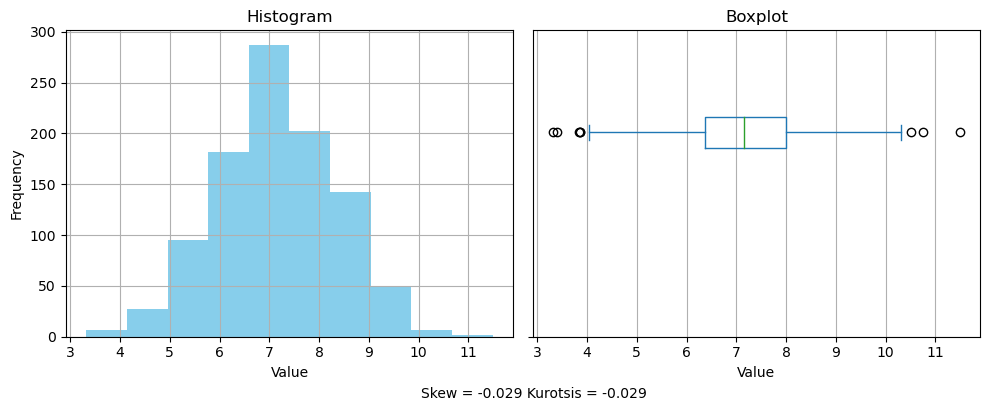

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.029 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.019 < 0.

#### volatile_acidity

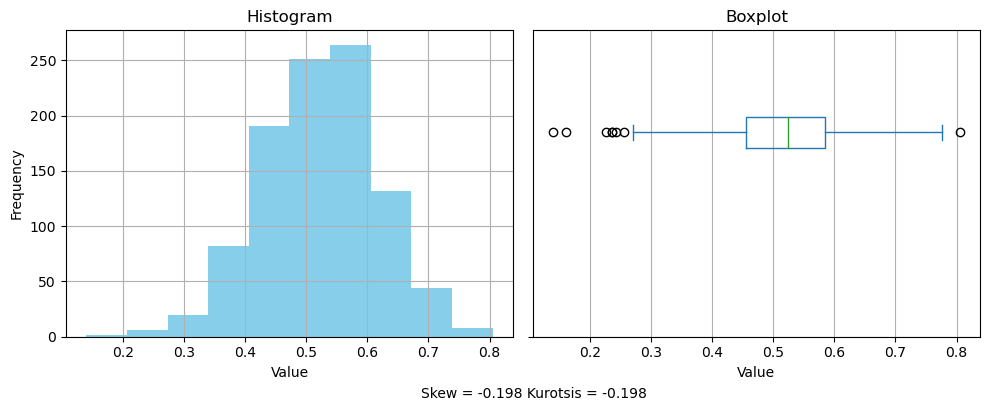

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.198 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.162 > 0.

#### citric_acid

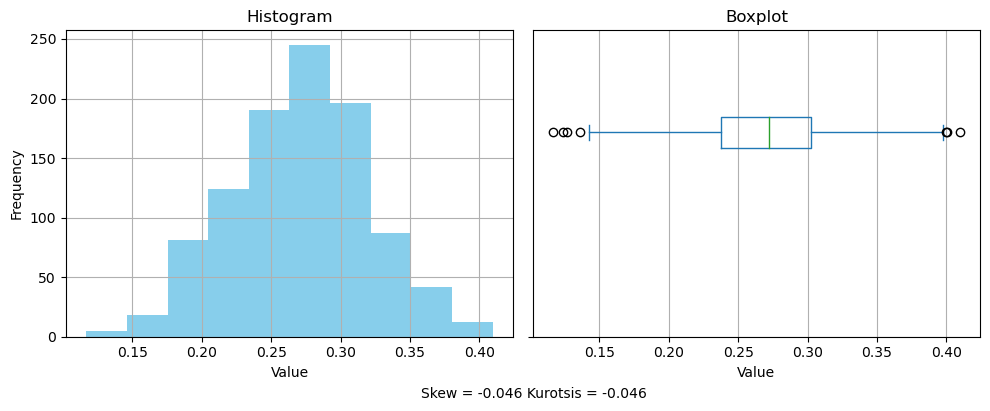

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.046 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.105 < 0.

#### residual_sugar

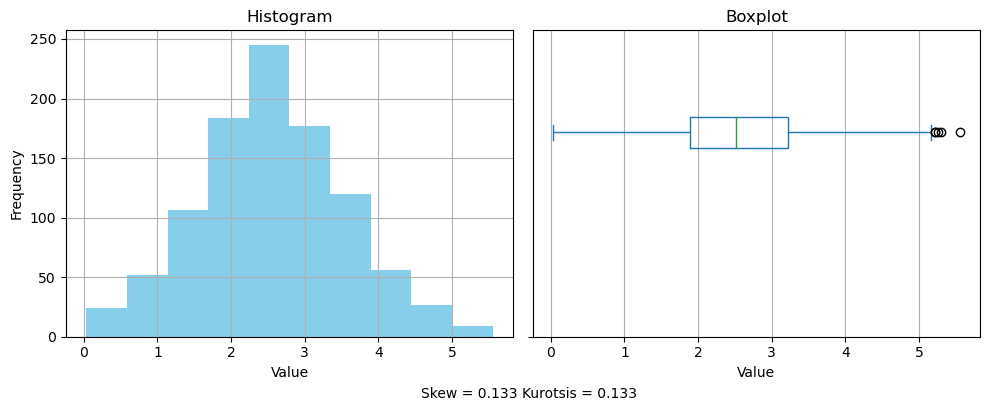

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.133 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.043 < 0.

#### chlorides

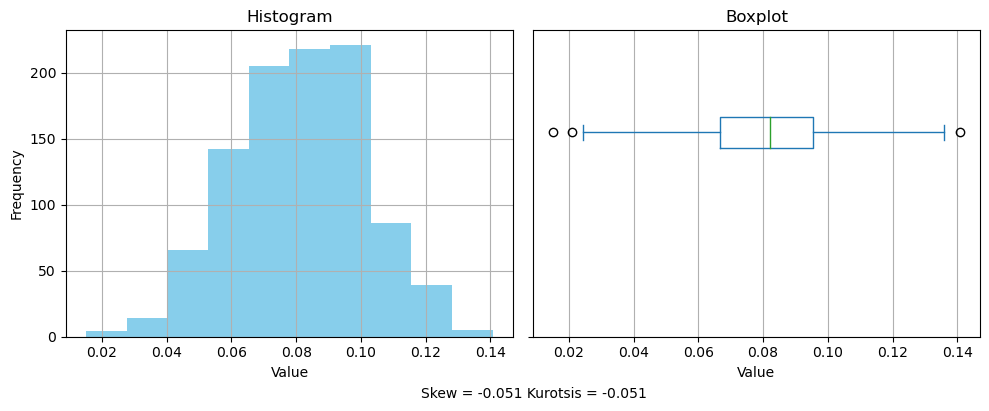

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.051 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.247 < 0.

#### free_sulfur_dioxide

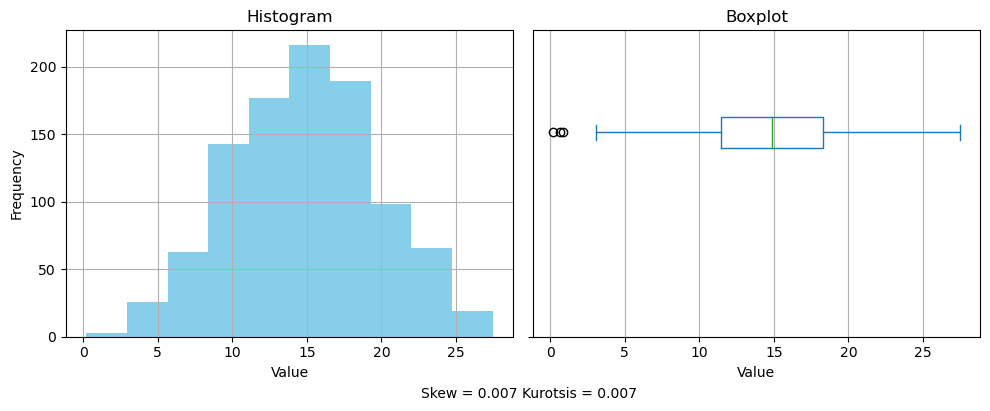

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.007 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.365 < 0.

#### total_sulfur dioxide

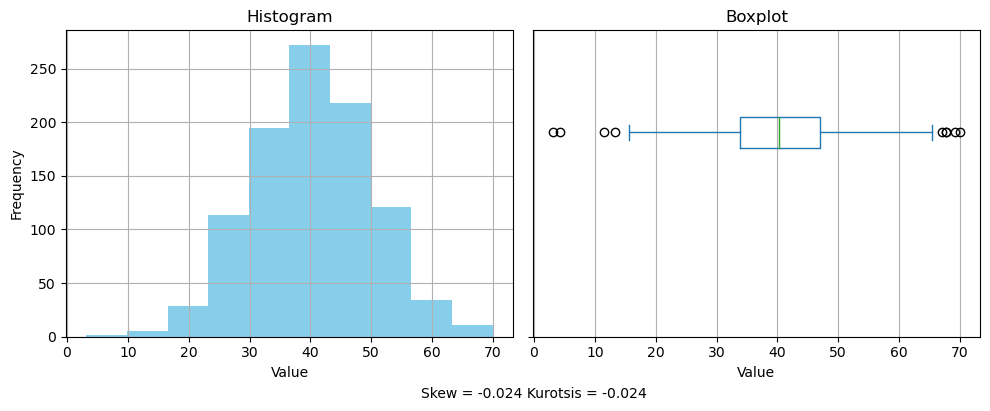

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.024 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.064 > 0.

#### density

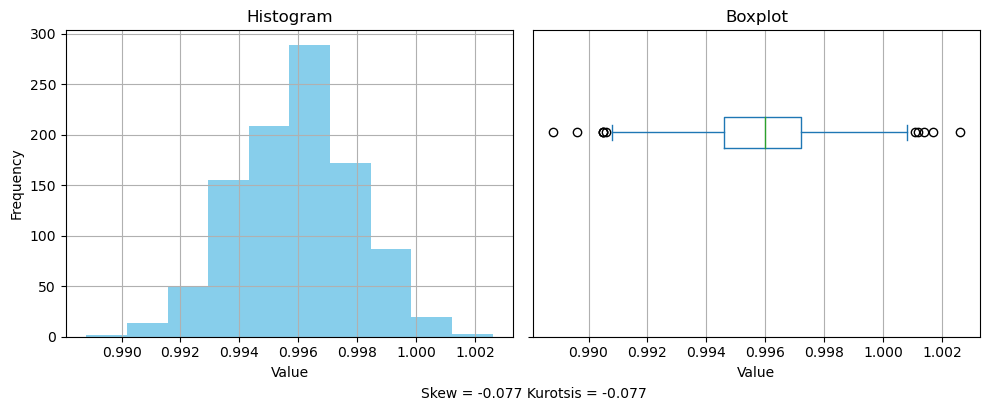

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.077 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.016 > 0.

#### pH

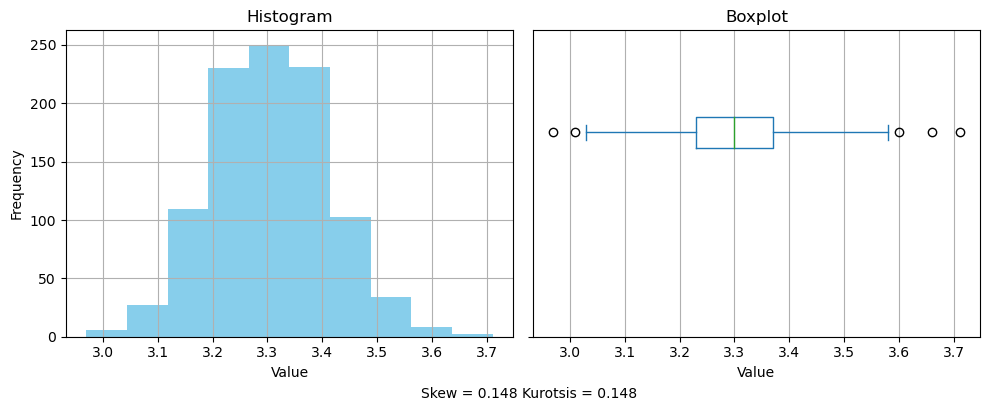

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.148 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.081 > 0.

#### sulphates

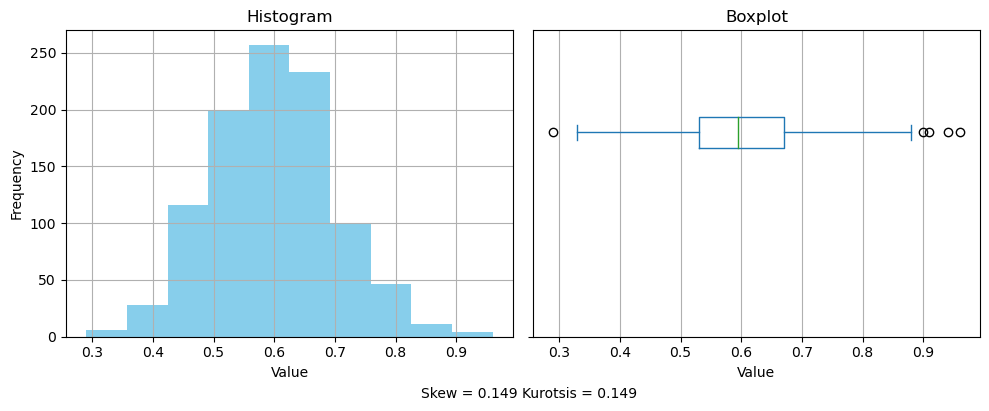

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = 0.149 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.065 > 0.

#### alcohol

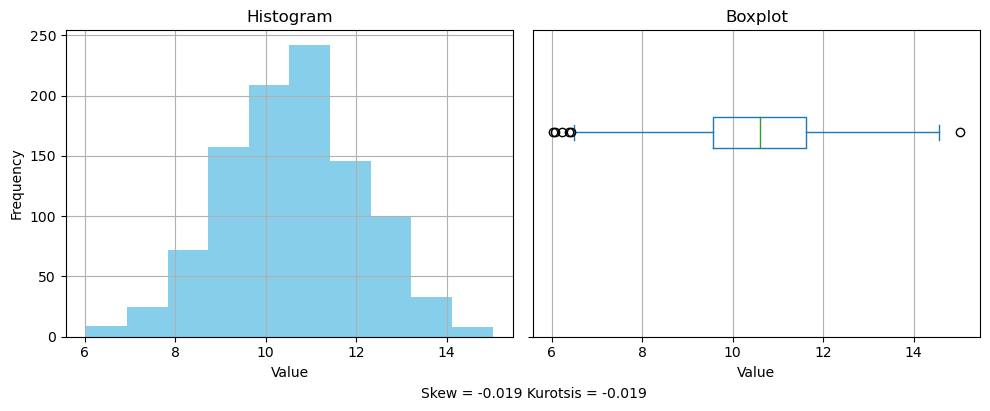

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.019 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut kurang dari distribusi normal atau ***platykurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = -0.132 < 0.

#### quality

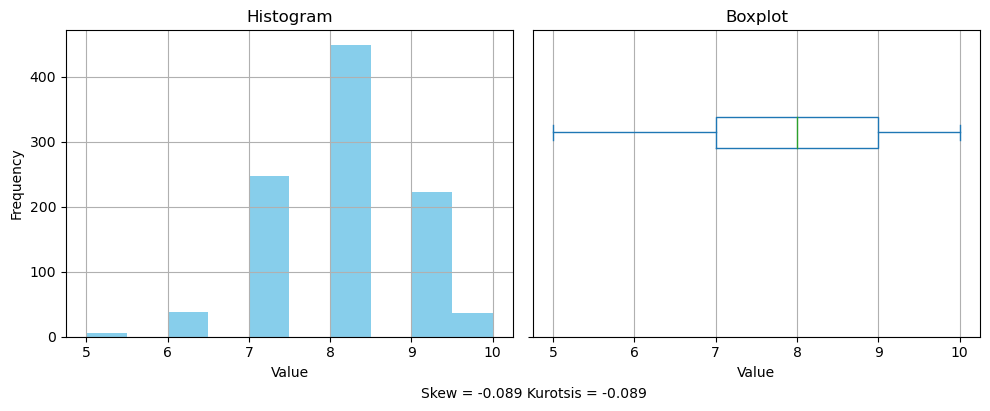

Pada histogram, terlihat distribusi data relatif terpusat ditengah atau ***approximately symmetric*** Pada boxplot juga terlihat nilai median berada relatif ditengah *interquartile range* yang menandakan bahwa distribusi data relatif simetris. Hal ini juga terkonfirmasi oleh deskripsi numerik dengan nilai *skewness* = -0.089 berada diantara -0.5 hingga 0.5.

Pada histrogram, dapat dilihat pula *peakedness* dari distribusi tersebut lebih dari distribusi normal atau ***leptokurtic***. Hal ini dapat terkonfirmasi oleh nilai *kurtosis* = 0.108 > 0.

In [48]:
for column_name in list(df):
    markdown(f"#### {column_name}")
    show_plot(column_name)
    explain_plot(column_name)
    print("\n\n")

#### Nomor 3 
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

In [49]:
def show_histplot(column_name) :
    df1 = df[column_name]
    sns.histplot(df1, kde=True, stat="density", linewidth=1)
    
    stat, p_value = shapiro(df1)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = norm.fit(df1) 
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=1, color='red')
    
    plt.annotate(f"P-Value = {p_value}", 
                xy = (0.25, -0.2),
                xycoords='axes fraction')

#### fixed_acidity

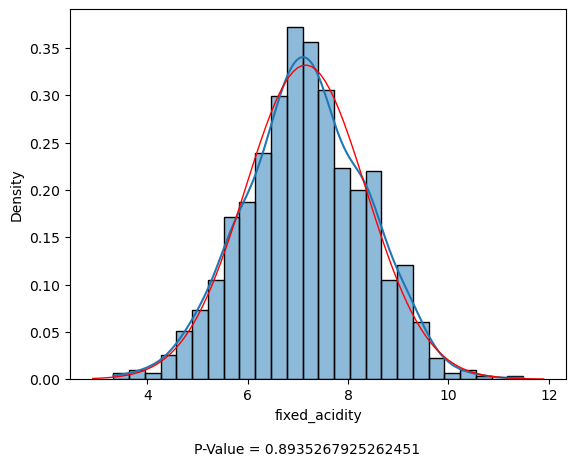

In [50]:
markdown("#### " + list(df)[0])
show_histplot(list(df)[0])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom fixed acidity **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.893 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom fixed acidity **terdistribusi secara normal**.

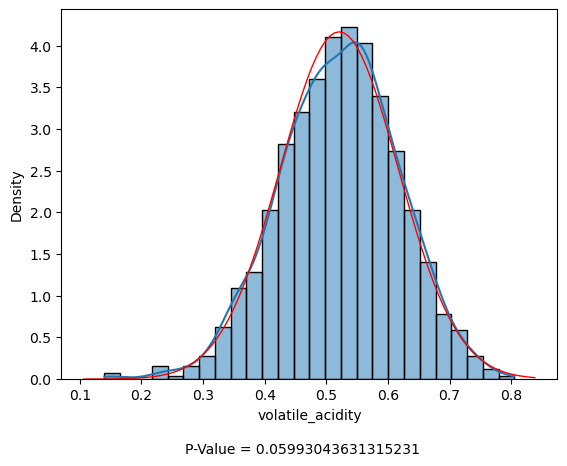

In [51]:
show_histplot(list(df)[1])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom volatile acidity **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.059 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom volatile acidity **terdistribusi secara normal**.

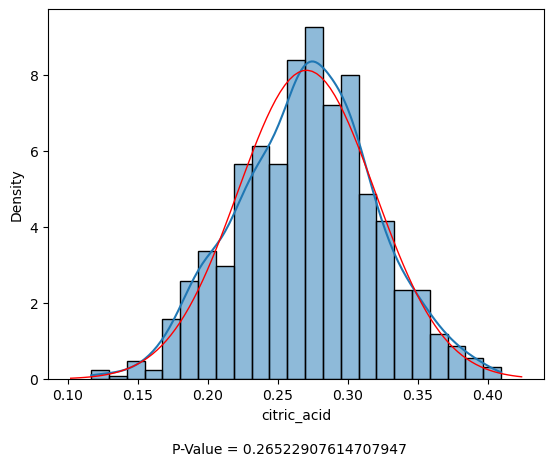

In [52]:
show_histplot(list(df)[2])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom citric acid **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.265 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom citric acid **terdistribusi secara normal**.

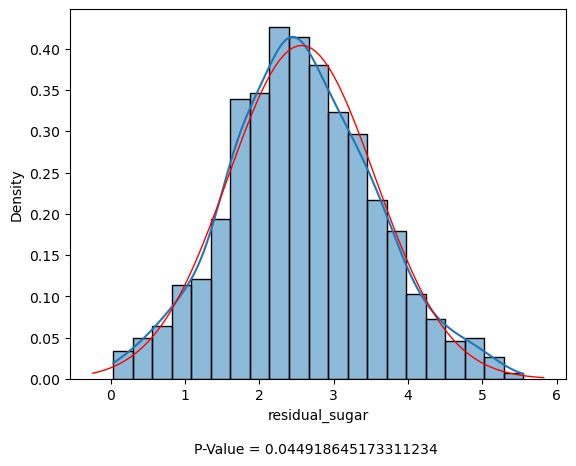

In [53]:
show_histplot(list(df)[3])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva condong ke kiri
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva tidak melandai dengan mulus
+ kurva lebih kurus, lebih lancip, dan lebih condong ke kiri dari *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut tidak mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom residual sugar ** tidak terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.045 yang lebih kecil dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom residual sugar **tidak terdistribusi secara normal**.

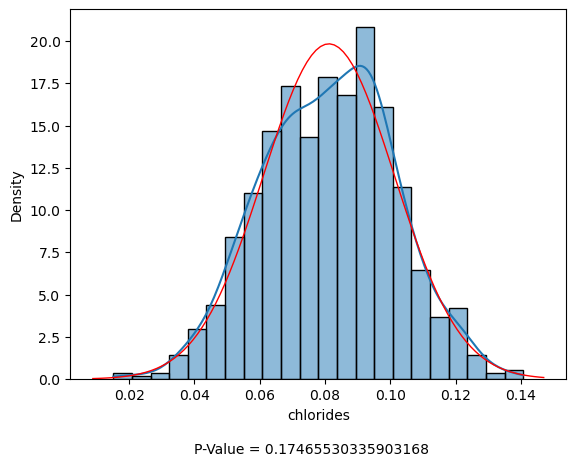

In [54]:
show_histplot(list(df)[4])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom chlorides **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.174 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom chlorides **terdistribusi secara normal**.

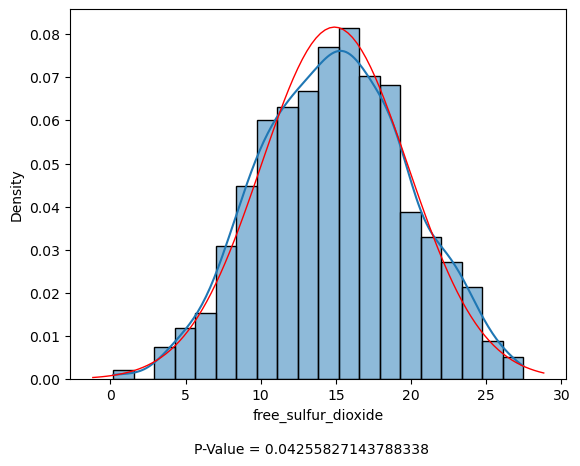

In [55]:
show_histplot(list(df)[5])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva tidak melandai dengan mulus
+ kurva lebih gemuk, lebih tumpul, dari *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut tidak mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom free sulfur dioxide** tidak terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.043 yang lebih kecil dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom free sulfur dioxide **tidak terdistribusi secara normal**.

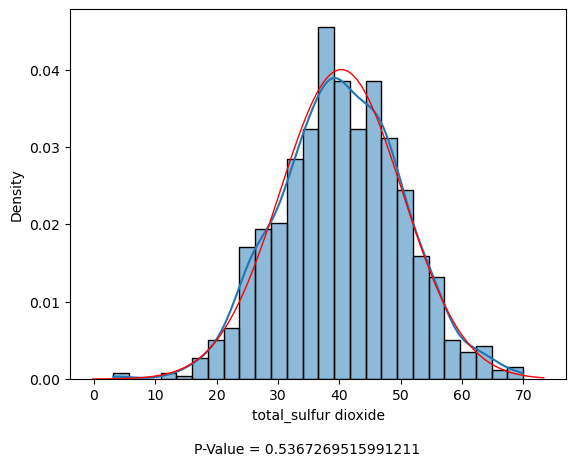

In [56]:
show_histplot(list(df)[6])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom total_sulfur dioxide **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.537 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom total_sulfur dioxide **terdistribusi secara normal**.

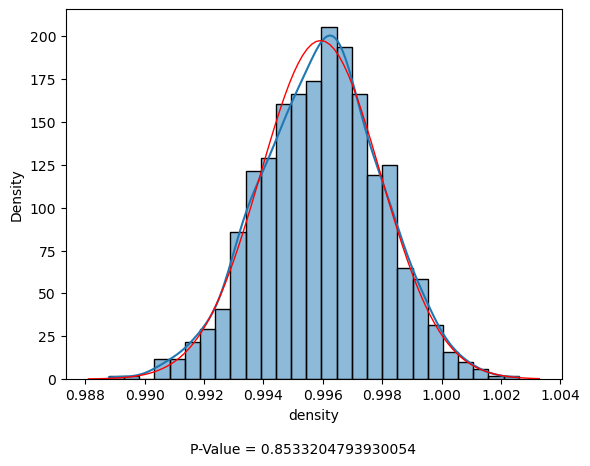

In [57]:
show_histplot(list(df)[7])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom density **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.853 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom density **terdistribusi secara normal**.

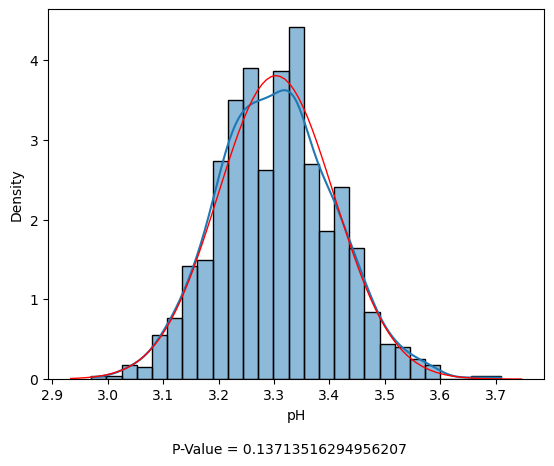

In [58]:
show_histplot(list(df)[8])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom pH **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.137 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom pH **terdistribusi secara normal**.

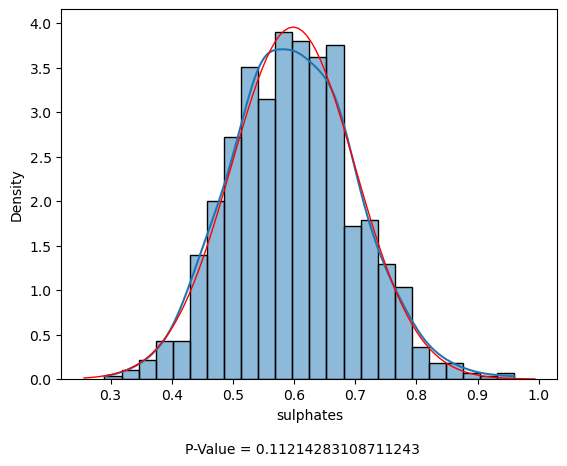

In [59]:
show_histplot(list(df)[9])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom sulphates **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.112 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom sulphates **terdistribusi secara normal**.

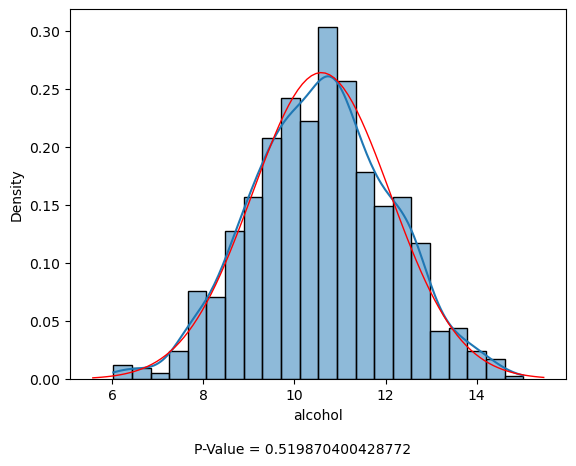

In [60]:
show_histplot(list(df)[10])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ hanya ada satu peak pada kurva/ kurva bersifat unimodal
+ kurva relatif melandai dengan mulus tanpa ada *peak* 
+ kurva relatif menyerupai *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom alcohol **terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.51937 yang lebih besar dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **tidak dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom alcohol **terdistribusi secara normal**.

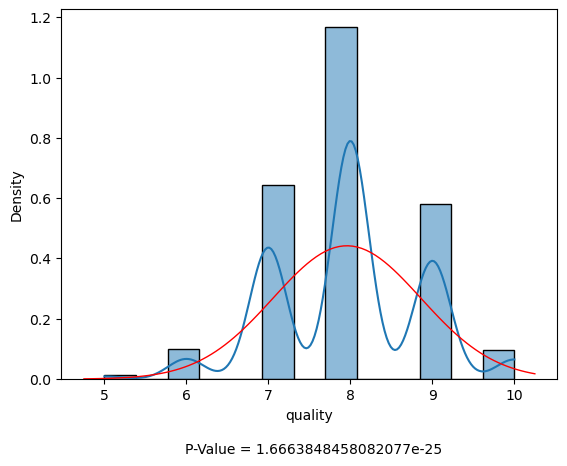

In [61]:
show_histplot(list(df)[11])

Pada kurva/plot histogram, terlihat bahwa: 
+ kurva relatif simetrik
+ terdapat tiga peak pada kurva/ kurva bersifat trimodal
+ kurva tidak melandai dengan mulus
+ kurva berbeda jauh dari *bells curve* referensi (garis merah) 

Keempat deskripsi tersebut tidak mengindikasikan kurva normal maka berdasarkan visualisasi histogram dapat disimpulkan bahwa data pada kolom quality **tidak terdistribusi secara normal**.

Selanjutnya, dengan  *Shapiro-Wilk test* akan diuji apakah kurva tersebut merupakan kurva normal atau bukan. Berdasarkan *Shapiro-Wilk test* diperoleh nilai p-value sebesar 0.000 yang lebih kecil dari *threshold* yaitu 0.05. Maka berdasarkan *Shapiro-Wilk test* **dapat dibuktikan** bahwa kurva tersebut **tidak** terdistribusi secara normal. Hal ini mendukung pernyataan kesimpulan sebelumnya bahwa data pada kolom quality **tidak terdistribusi secara normal**.

#### Nomor 4
Melakukan test hipotesis 1 sampel,
+ Nilai rata-rata pH di atas 3.29?
+ Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
+ Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
+ Nilai rata-rata total sulfur dioxide di bawah 35?
+ Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

In [62]:
markdown("## Data Kualitas Untuk Soal No 4 dan 5")
display(df)

## Data Kualitas Untuk Soal No 4 dan 5

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


#### Nomor 4.a. Nilai rata-rata pH diatas 3.29? 
Tentukan **H0** dan **H1** yang didapat:
+ **H0** :  $ \mu = 3.29 $
+ **H1** :  $ \mu > 3.29 $

Karena hipotesis alternatif hanya mempertimbangkan $\mu$ dari satu sisi garis bilangan, maka dilakukan one-tailed test.

Definisikan daerah kritis yang adalah $\alpha = 0.05$

Kalkulasi nilai Z untuk alpha ($\alpha$):

In [63]:
zAlpha = norm.ppf(1-0.05)
markdown(f"Daerah kritis $\\alpha$ didapatkan {zAlpha:.3f}")

Daerah kritis $\alpha$ didapatkan 1.645

Selanjutnya, karena testing hipotesis rata-rata dan jumlah populasi yang berukuran besar, dilakukan z-test untuk menguji hipotesis tersebut. Dengan rumus sebagai berikut.

$$z = \frac{(\bar{x} - \mu_0)} {(\sigma / \sqrt{n})}$$


In [66]:
def hitungZ(hipotesis, dataKolom):
    ret = (np.mean(dataKolom)-hipotesis)/(np.std(dataKolom)/np.sqrt(len(dataKolom)))
    return ret

testRes = hitungZ(3.29, df['pH'])
nilaiP = norm.sf(testRes)

markdown(f"Maka, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP}")

Maka, didapatkan hasil:

 - Nilai uji Z = 4.106 

 - P-value = 2.0142916469885964e-05

Jika dibandingkan, nilai uji z yang didapat dengan z alpha adalah $4.106>1.645$. Berdasarkan hal tersebut hipotesis **H0** ditolak. Pernyataan tersebut didukung oleh hasil P-value yang lebih kecil dari nilai $\alpha$.

Maka, hipotesis **H0** **ditolak** sehingga rata-rata pH adalah diatas 3.29

#### Nomor 4.b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\mu = 2.5$
+ **H1**: $\mu \ne 2.5$

Hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan, sehingga akan digunakan **two-tailed test**.

Definisikan daerah kritis $\alpha=0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [26]:
zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Rumus z-test yang digunakan pada soal 4.a. digunakan kembali pada persoalan ini.

In [27]:
testRes = hitungZ(2.5, df['residual_sugar'])
nilaiP = 2 * (norm.sf(testRes))

markdown(f"Maka, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP:.3f}")

Maka, didapatkan hasil:

 - Nilai uji Z = 2.149 

 - P-value = 0.032

Nilai uji z yang dihasilkan diatas berada dalam daerah kritis yang sudah didefinisikan sebelumnya ($-1.960<z<1.960$) dan juga p-value lebih kecil dari $\alpha$ ($0.032<0.05$).

Sehingga, hipotesis **H0 ditolak** dan rata-rata residual sugar tidak sama dengan 2.50.

#### Nomor 4.c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

Data yang digunakan hanyalah 150 baris pertama dari kolom sulphates yang adalah:

In [74]:
data = df['sulphates'].head(150)
display(data)

0      0.71
1      0.57
2      0.64
3      0.55
4      0.45
       ... 
145    0.73
146    0.79
147    0.73
148    0.63
149    0.60
Name: sulphates, Length: 150, dtype: float64

Tentukan hipotesis awal dan alternatif:
+ **H0**: $\mu = 0.65$
+ **H1**: $\mu \ne 0.65$

Seperti soal sebelumnya, hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan sehingga akan digunakan **two-tailed test** juga dengan uji test yang sama pula.

Definisikan daerah kritis $\alpha=0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [86]:
zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $Z<{zAlphaKiri:.3f} V Z>{zAlphaKanan:.3f}$')

testRes = hitungZ(0.65, data)
nilaiP = 2 * (norm.cdf(testRes))

markdown(f"Maka, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP:.7f}")


Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $Z<-1.960 V Z>1.960$

Maka, didapatkan hasil:

 - Nilai uji Z = -4.981 

 - P-value = 0.0000006

Karena nilai z jatuh pada *critical section* dan p-value < $\alpha$. 
Maka, hipotesis **H0 ditolak**.

#### Nomor 4.d. Nilai rata-rata total sulfur dioxide di bawah 35?

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\mu = 35$
+ **H1**: $\mu < 35$

Pada soal ini digunakan **one-tailed test** dengan daerah kritis $\alpha = 0.05$

Kalkulasikan nilai z untuk $\alpha$, nilai uji statistik, dan juga p-value.


In [84]:
zAlpha = norm.ppf(0.05)
markdown(f'Didapatkan nilai z untuk $\\alpha$ adalah {zAlpha:.3f} dan daerah kritisnya $z<{zAlpha:.3f}$')

testRes = hitungZ(35, df['total_sulfur dioxide'])
nilaiP = norm.cdf(testRes)

markdown(f'Maka, dari kalkulasi didapatkan:')
markdown(f' - Nilai uji Z = {testRes:.3f}')
markdown(f' - p-value = {nilaiP}')

Didapatkan nilai z untuk $\alpha$ adalah -1.645 dan daerah kritisnya $z<-1.645$

Maka, dari kalkulasi didapatkan:

 - Nilai uji Z = 16.795

 - p-value = 1.0

Nilai uji yang didapatkan jauh diatas nilai z alpha ($z>z\alpha$) sehingga z tidak terletak pada daerah kritis.

Oleh karena itu, hipotesis **H0 tidak dapat ditolak atau diterima** karena tidak ada cukup bukti untuk memutuskan hal tersebut.

#### Nomor 4.e. Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

Soal berikut berbeda dengan soal sebelumnya yang mencari nilai rata-rata dari data yang disediakan. Pada soal ini dicari nilai proporsi dari suatu populasi dengan rumus sebagai berikut.

$$Z = \frac{(\^{P} - P_0)} {\sqrt{((P_0(1 - P_0) / n) )}}$$

Lalu data yang digunakan hanyalah total sulfur dioxide yang lebih dari 40

In [87]:
# Rumus dan ketentuan data
def hitungZ2(p,pZero,kolom):
    res = (p - pZero)/(np.sqrt(pZero*(1-pZero)/len(kolom)))
    return res

df.rename(columns={'total_sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
data = df.total_sulfur_dioxide[df['total_sulfur_dioxide'] > 40]
markdown("##### Total Sulfur Dioxide yang lebih dari 40")
display(data)

##### Total Sulfur Dioxide yang lebih dari 40

0      42.27
3      41.97
4      46.27
5      51.05
6      44.26
       ...  
992    41.54
993    45.74
995    44.61
997    48.75
998    44.53
Name: total_sulfur_dioxide, Length: 512, dtype: float64

Tentukan hipotesis awal dan alternatif.
+ **H0**: $P = 50\% $
+ **H1**: $P \ne 50\% $

Dilihat dari hipotesis alternatif yang mempertimbangkan dua arah, akan digunakan **two-tailed test** dan uji statistik z-test.

Definisikan daerah kritis $\alpha=0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [32]:
zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

p = len(data)/len(df['total_sulfur_dioxide'])
testRes = hitungZ2(p, 0.5, df['total_sulfur_dioxide'])
nilaiP = 2 * (norm.sf(testRes))

markdown(f"Dengan $P={p}$, didapatkan hasil:")
markdown(f" - Nilai uji Z = {testRes:.3f} ")
markdown(f" - P-value = {nilaiP:.3f}")

Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Dengan $P=0.512$, didapatkan hasil:

 - Nilai uji Z = 0.759 

 - P-value = 0.448

Hasil nilai uji yang didapat tidak berada pada daerah kritis ($-1.960<0.759<1.960$). Selain itu, p-value bernilai lebih besar dari pada $\alpha$ ($0.448>0.05$).

Maka, dari hasil diatas, hipotesis **H0 diterima** dan proporsi nilai total sulfur dioxide yang lebih dari 40, adalah sama dengan 50%

#### Nomor 5
Melakukan test hipotesis 2 sampel,
+ Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata kedua bagian tersebut sama?
+ Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
+ Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
rata-rata 25 baris pertama kolom Sulphates ?
+ Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
+ Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

Referensi

```
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/
```


##### Nomor 5.a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Dua sampel yang digunakan adalah kolom fixed acidity yang dibagi 2. Dibawah ini adalah pembagiannya dengan kode python.

Rumus yang digunakan untuk tes statistik juga sedikit berbeda yang adalah seperti berikut.

$$ z = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$

In [91]:
# Bagi dua kolom fixed acidity
bagian1 = df['fixed_acidity'][:(len(df['fixed_acidity'])//2)]
bagian2 = df['fixed_acidity'][(len(df['fixed_acidity'])//2):]

markdown("##### Bagian pertama kolom fixed_acidity")
display(bagian1)
markdown("##### Bagian kedua kolom fixed_acidity")
display(bagian2)

def hitungZ3(kolom1, kolom2, h1, h2):
    ret = ((np.mean(kolom1)-np.mean(kolom2))-(h1 - h2))/(np.sqrt((np.std(kolom1)**2/len(kolom1)) + (np.std(kolom2)**2/len(kolom2))))
    return ret

##### Bagian pertama kolom fixed_acidity

0      5.90
1      8.40
2      7.54
3      5.39
4      6.51
       ... 
495    7.88
496    7.82
497    7.17
498    7.57
499    7.03
Name: fixed_acidity, Length: 500, dtype: float64

##### Bagian kedua kolom fixed_acidity

500    8.10
501    7.28
502    6.88
503    8.32
504    8.71
       ... 
995    7.96
996    8.48
997    6.11
998    7.76
999    5.87
Name: fixed_acidity, Length: 500, dtype: float64

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\mu1 = \mu2 $
+ **H1**: $\mu1 \ne \mu2$

Hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan sehingga akan digunakan **two-tailed test**.

Digunakan nilai $\alpha = 0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

Dengan kesimpulan hipotesis ($\mu1 = \mu2$) maka $\mu1-\mu2=0$ sehingga rumus menjadi:
$$ z = \frac{(\bar{x_1} - \bar{x_2})}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$


In [97]:
def hitungZMuSama(kolom1, kolom2):
    p = np.mean(kolom1)-np.mean(kolom2)
    q = np.sqrt((np.std(kolom1)**2)/len(kolom1) + (np.std(kolom2)**2)/len(kolom2))

    return p/q

zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

testRes = hitungZMuSama(bagian1, bagian2)
nilaiP = 2*norm.sf(testRes)
markdown(f'Maka, dari kalkulasi didapatkan:')
markdown(f' - Nilai uji Z = {testRes:.3f}')
markdown(f' - p-value = {nilaiP:.3f}')

Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Maka, dari kalkulasi didapatkan:

 - Nilai uji Z = 0.319

 - p-value = 0.750

Nilai z yang dihasilkan berada diluar daerah kritis ($-1.960<0.026<1.960$). Lalu p-value yang dihasilkan lebih besar dibandingkan $\alpha$.

Berdasarkan hasil diatas, hipotesis **H0 diterima** dan rata-rata bagian awal dan akhir kolom fixed acidity adalah sama.

#### Nomor 5.b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

Dua sampel yang digunakan adalah kolom Chlorides yang dibagi 2. Dibawah ini adalah pembagiannya dengan kode python.

Dengan kesimpulan hipotesis $\mu1-\mu2=0.001$ sehingga rumus menjadi:
$$ z = \frac{(\bar{x_1} - \bar{x_2}) - 0.001}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\mu1-\mu2 = 0.001 $
+ **H1**: $\mu1-\mu2 \ne 0.001$

Hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan sehingga akan digunakan **two-tailed test**.

Digunakan nilai $\alpha = 0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [98]:
# Bagi dua kolom chlorides
bagian1 = df['chlorides'][:(len(df['chlorides'])//2)]
bagian2 = df['chlorides'][(len(df['chlorides'])//2):]

markdown("##### Bagian pertama kolom chlorides")
display(bagian1)
markdown("##### Bagian kedua kolom chlorides")
display(bagian2)

# Rumus 
def hitungZSelisihMu(kolom1, kolom2):
    ret = ((np.mean(kolom1)-np.mean(kolom2))-0.001)/(np.sqrt((np.std(kolom1)**2/len(kolom1)) + (np.std(kolom2)**2/len(kolom2))))
    return ret

zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

testRes = hitungZSelisihMu(bagian1, bagian2)
nilaiP = 2*norm.cdf(testRes)
markdown(f'Maka, dari kalkulasi didapatkan:')
markdown(f' - Nilai uji Z = {testRes:.3f}')
markdown(f' - p-value = {nilaiP:.3f}')

##### Bagian pertama kolom chlorides

0      0.070574
1      0.101681
2      0.072416
3      0.072755
4      0.066379
         ...   
495    0.094400
496    0.056809
497    0.092192
498    0.041608
499    0.071467
Name: chlorides, Length: 500, dtype: float64

##### Bagian kedua kolom chlorides

500    0.079678
501    0.094940
502    0.074843
503    0.091232
504    0.085907
         ...   
995    0.057555
996    0.051627
997    0.042806
998    0.098276
999    0.052923
Name: chlorides, Length: 500, dtype: float64

Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Maka, dari kalkulasi didapatkan:

 - Nilai uji Z = -0.468

 - p-value = 0.640

Nilai z yang dihasilkan berada diluar daerah kritis ($-1.960<-0.468<1.960$). Lalu p-value yang dihasilkan lebih besar dibandingkan $\alpha$.

Berdasarkan hasil diatas, hipotesis **H0 diterima** dan rata-rata bagian awal dan akhir kolom chlorides selisihnya adalah 0.001.

#### Nomor 5.c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

Dua sampel yang digunakan adalah 25 baris kolom volatile acidity dan 25 baris kolom sulphate. Dibawah ini adalah pembagiannya dengan kode python.

In [104]:
# ambil kedua data
volatileAcidData = df['volatile_acidity'].head(25)
sulphateData = df['sulphates'].head(25)

markdown("##### Volatile Acidity Data")
display(volatileAcidData)
markdown("##### Sulphate Data")
display(sulphateData)

##### Volatile Acidity Data

0     0.4451
1     0.5768
2     0.5918
3     0.4201
4     0.5675
5     0.3332
6     0.4997
7     0.4066
8     0.4392
9     0.3924
10    0.5754
11    0.5754
12    0.4509
13    0.5576
14    0.5461
15    0.5072
16    0.7358
17    0.4359
18    0.5214
19    0.4818
20    0.4828
21    0.5359
22    0.4906
23    0.4340
24    0.5324
Name: volatile_acidity, dtype: float64

##### Sulphate Data

0     0.71
1     0.57
2     0.64
3     0.55
4     0.45
5     0.63
6     0.44
7     0.68
8     0.59
9     0.51
10    0.57
11    0.46
12    0.49
13    0.59
14    0.82
15    0.54
16    0.69
17    0.43
18    0.64
19    0.50
20    0.72
21    0.45
22    0.74
23    0.66
24    0.35
Name: sulphates, dtype: float64

Dengan kesimpulan hipotesis ($\mu1 = \mu2$) maka $\mu1-\mu2=0$ sehingga rumus menjadi:
$$ z = \frac{(\bar{x_1} - \bar{x_2})}{\sqrt{{\sigma_1^2/n_1} + {\sigma_2^2/n_2}}} $$

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\mu1 = \mu2 $
+ **H1**: $\mu1 \ne \mu2$

Hipotesis alternatif mempertimbangkan nilai dari kedua sisi garis bilangan sehingga akan digunakan **two-tailed test**.

Digunakan nilai $\alpha = 0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

In [105]:
# ambil kedua data
volatileAcidData = df['volatile_acidity'].head(25)
sulphateData = df['sulphates'].head(25)

zAlphaKanan = norm.ppf(1-0.025)
zAlphaKiri = norm.ppf(0.025)

markdown(f'Nilai Z kanan dan kiri sebagai batas daerah kritis adalah ${zAlphaKiri:.3f}<z<{zAlphaKanan:.3f}$')

testRes = hitungZMuSama(volatileAcidData, sulphateData)
nilaiP =  2*norm.cdf(testRes)
markdown(f'Maka, dari kalkulasi didapatkan:')
markdown(f' - Nilai uji Z = {testRes:.3f}')
markdown(f' - p-value = {nilaiP:.3f}')

Nilai Z kanan dan kiri sebagai batas daerah kritis adalah $-1.960<z<1.960$

Maka, dari kalkulasi didapatkan:

 - Nilai uji Z = -2.692

 - p-value = 0.007

Nilai uji z hasil kalkulasi berada dalam daerah kritis karena $ -2.692 < −1.960$ dan p value yang dihasilkan kurang dari $\alpha$.

Oleh karena itu, hipotesis **H0 ditolak**.

#### Nomor 5.d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

Dua sampel yang digunakan adalah kolom residual sugar yang dibagi 2. Dibawah ini adalah pembagiannya dengan kode python.

In [112]:
# Bagi dua kolom residual sugar
head = df['residual_sugar'][:(len(df['residual_sugar'])//2)]
tail = df['residual_sugar'][(len(df['residual_sugar'])//2):]

markdown("##### Bagian pertama kolom residual_sugar")
display(head)
markdown("##### Bagian kedua kolom residual_sugar")
display(tail)

##### Bagian pertama kolom residual_sugar

0      2.049401
1      3.109590
2      3.673744
3      3.371815
4      4.404723
         ...   
495    0.225288
496    3.743606
497    2.803720
498    3.365912
499    2.328736
Name: residual_sugar, Length: 500, dtype: float64

##### Bagian kedua kolom residual_sugar

500    2.684752
501    3.834531
502    3.513471
503    1.572885
504    1.705161
         ...   
995    1.592048
996    0.681955
997    2.377267
998    4.294486
999    2.179490
Name: residual_sugar, Length: 500, dtype: float64

Tentukan hipotesis awal dan alternatif.
+ **H0**: $\sigma_1^2 = \sigma_2^2$
+ **H1**: $\sigma_1^2 \ne \sigma_2^2$

Hipotesis alternatif mempertimbangkan nilai variansi dari kedua sisi garis bilangan sehingga akan digunakan **two-tailed F test** seperti berikut.
$$f_{\alpha/2}(v1,v2) < f < f_{1-\alpha/2}(v1,v2)$$

Digunakan nilai $\alpha = 0.05$ sehingga untuk sisi kanan dan sisi kiri $\alpha = \alpha/2 = 0.025$

Untuk menghitung nilai f akan digunakan rumus sebagai berikut.
$$ f = \frac{s_1^2}{s_2^2} $$

In [119]:
# Menghitung batas daerah kritis
import scipy.stats

fAtas = scipy.stats.f.ppf(1-0.025, len(tail)-1, len(tail)-1)
fBawah = scipy.stats.f.ppf(0.025, len(head)-1, len(head)-1)

markdown(f'Nilai f kanan dan kiri sebagai batas daerah kritis adalah ${fBawah:.3f}<f<{fAtas:.3f}$')

# Hitung nilai f
f = np.var(tail)/np.var(head)
nilaiP = 1- scipy.stats.f.cdf(f, len(tail)-1, len(head)-1)

markdown(f'Maka, dari kalkulasi didapatkan:')
markdown(f' - Nilai f = {f:.3f}')
markdown(f' - p-value = {nilaiP:.3f}')


Nilai f kanan dan kiri sebagai batas daerah kritis adalah $0.839<f<1.192$

Maka, dari kalkulasi didapatkan:

 - Nilai f = 1.062

 - p-value = 0.252

Nilai F yang dihasilkan berada dalam batasan $0.8392<1.062<1.192$. Lalu p-value lebih besar daripada $\alpha$

Maka, hipotesis **H0 diterima** dan variansi bagian data awal dan akhir dari kolom residual sugar adalah sama.

#### Nomor 5.e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

Data yang digunakan ada dua yaitu:
- nilai alcohol yang lebih dari 7 diambil setengah awal.
- nilai alcohol yang lebih dari 7 diambil setengah akhir.

Dibawah ini adalah pembagiannya dengan kode python.

In [120]:
data = df['alcohol']

bagian1 = data[:len(data)//2]
bagian2 = data[len(data)//2:]

bagian1Sel = bagian1.loc[bagian1 > 7]
bagian2Sel = bagian2.loc[bagian2 > 7]

display(bagian1Sel,bagian2Sel)


0       8.64
1      10.03
2       9.23
3      14.07
4      11.49
       ...  
494     8.60
496    14.56
497     9.95
498     9.73
499     8.37
Name: alcohol, Length: 495, dtype: float64

500    12.75
501    10.24
502    11.34
503    10.72
504    11.09
       ...  
995    10.41
996     9.91
997     9.94
998     9.76
999    10.17
Name: alcohol, Length: 495, dtype: float64

Tentukan hipotesis awal dan alternatif.
+ **H0**: $P_1 = P_2$
+ **H1**: $P_1 > P_2$

Hipotesis alternatif hanya mempertimbangkan satu sisi garis bilangan maka akan digunakan **one-tailed test**.

$\alpha = 0.05$ untuk batasan daerah kritisnya.

Pengujian proporsi dengan dua sampel memiliki rumus z sebagai berikut.
$$ z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p}\hat{q}({1/n_1} + {1/n_2})}} $$

Dengan penghitungan $\hat{p}$ menggunakan
$$\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$$

dan penghitungan  $\hat{q}$ menggunakan
$$\hat{q} = 1 - \hat{p}$$

In [121]:
zAlpha = norm.ppf(1-0.05)
markdown(f'Nilai z sebagai batas daerah kritis adalah $z<{zAlpha:.3f}$')

pTotal = (len(bagian1Sel)+len(bagian2Sel))/len(data)

p1 = len(bagian1Sel) / len(bagian1)
p2 = len(bagian2Sel) / len(bagian2)

print(p1,p2)

zTestRes = (p1-p2)/np.sqrt(pTotal*(1-pTotal)*((1/len(bagian1)) + (1/len(bagian2))))
nilaiP = norm.cdf(zTestRes)

markdown(f'Maka, dari kalkulasi didapatkan:')
markdown(f' - Nilai z = {zTestRes:.3f}')
markdown(f' - p-value = {nilaiP:.3f}')


Nilai z sebagai batas daerah kritis adalah $z<1.645$

0.99 0.99


Maka, dari kalkulasi didapatkan:

 - Nilai z = 0.000

 - p-value = 0.500

Didapat nilai z yang berada diluar daerah kritis $0<1.645$ dan P-valuenya lebih besar dari $\alpha$

Maka, hipotesis **H0 diterima** dan proporsi bagian awal dan akhir kolom alcohol dengan nilai lebih dari 7 adalah sama.